In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing  import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lab02R01Pc05\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv("spam.csv",encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# Data Preprocessing 
    1- Data Cleaning
    2- EDA 
    3- Text Preprocessing
    

### 1- Data Cleaninig

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop unnecessary columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [8]:
df.sample(5)

,v1,v2
4629,ham,Everybody had fun this evening. Miss you.
3612,ham,Depends on individual lor e hair dresser say p...
100,ham,Okay name ur price as long as its legal! Wen c...
2124,ham,Beautiful Truth against Gravity.. Read careful...
4044,ham,If You mean the website. Yes.


In [9]:
# renaming columns 
df = df.rename(columns={'v1':'target','v2':"text"})

In [10]:
df.sample(5)

,target,text
3734,ham,"ItÛ÷s å£6 to get in, is that ok?"
1078,ham,Convey my regards to him
3164,ham,Cheers for the card ... Is it that time of yea...
70,ham,Wah lucky man... Then can save money... Hee...
3055,ham,Webpage s not available!


In [11]:
df.target.unique()

array(['ham', 'spam'], dtype=object)

In [12]:
#Classification - Binary Classfication

In [13]:
encoder = LabelEncoder()
df.target = encoder.fit_transform(df.target)

In [14]:
df.head(10)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep="first")

In [18]:
df.shape

(5169, 2)

In [19]:
df.duplicated().sum()

0

### 2. Exploratory Data Analysis (EDA)

In [20]:
label_counts = df.target.value_counts()
label_counts

0    4516
1     653
Name: target, dtype: int64

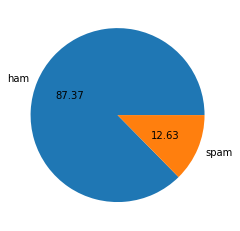

In [21]:
plt.pie(label_counts, labels=['ham','spam'],autopct="%.02f")
plt.show()

In [22]:
df['number_of_char']=df['text'].apply(len)
df.head()

,target,text,number_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['number_of_words']=df['text'].apply(lambda x:len(x.split(" ")))
df.head()

,target,text,number_of_char,number_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [24]:
df['number_of_sentences']=df['text'].apply(lambda x:len(x.split(".")))
df.head()

,target,text,number_of_char,number_of_words,number_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9
1,0,Ok lar... Joking wif u oni...,29,6,7
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,7
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [25]:
# number of words using tokenization
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df

,target,text,number_of_char,number_of_words,number_of_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,24
1,0,Ok lar... Joking wif u oni...,29,6,7,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,37
3,0,U dun say so early hor... U c already then say...,49,11,7,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,15
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,5,35
5568,0,Will Ì_ b going to esplanade fr home?,37,8,1,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,5,15
5570,0,The guy did some bitching but I acted like i'd...,125,26,1,27


In [27]:
df = df.drop('number_of_words',axis=1)

In [28]:
# number of words using tokenization
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head(10)

,target,text,number_of_char,number_of_sentences,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,9,24,2
1,0,Ok lar... Joking wif u oni...,29,7,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,2
3,0,U dun say so early hor... U c already then say...,49,7,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,2,39,4
6,0,Even my brother is not like to speak with me. ...,77,3,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,2,31,2
8,1,WINNER!! As a valued network customer you have...,158,4,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,1,31,3


In [30]:
df.iloc[0]['text']

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [31]:
df = df.drop('number_of_sentences',axis=1)

In [32]:
df

,target,text,number_of_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [33]:
# stats behind all new added columns
df[['number_of_char','num_words','num_sent']].describe()

,number_of_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# stats behind all new added columns in spam
df[df['target']==1][['number_of_char','num_words','num_sent']].describe()

,number_of_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
# stats behind all new added columns in ham
df[df['target']==0][['number_of_char','num_words','num_sent']].describe()

,number_of_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<AxesSubplot:xlabel='number_of_char', ylabel='Count'>

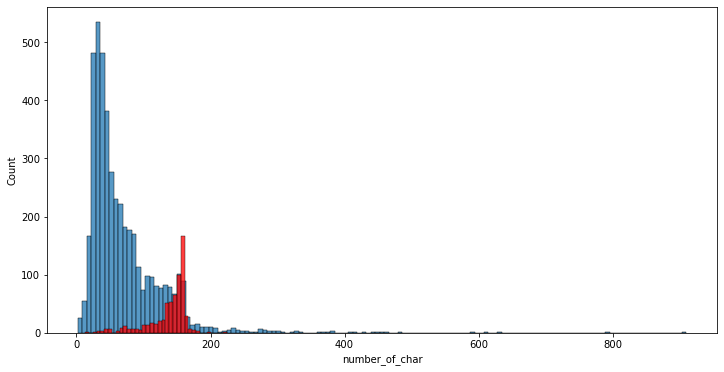

In [36]:
# ploting the nuymber of characters in both ham and spam
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot (df[df['target']==0]['number_of_char'])
sns.histplot(df[df['target']==1]['number_of_char'],color='red')


<AxesSubplot:xlabel='num_words', ylabel='Count'>

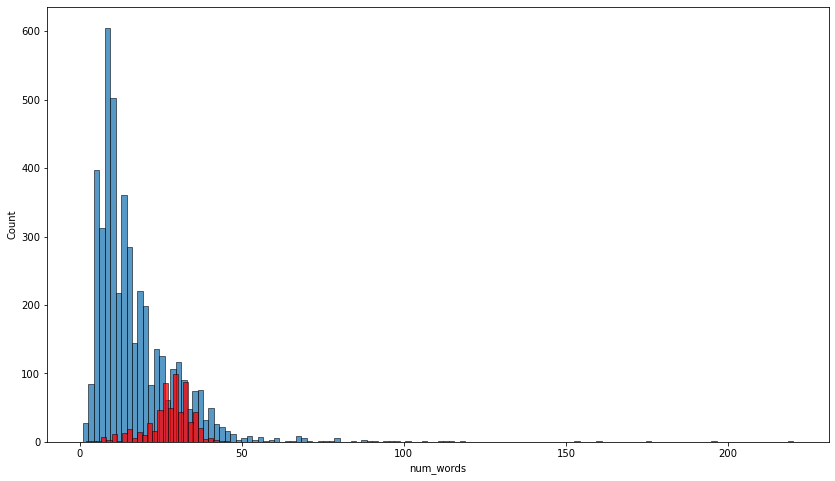

In [37]:
plt.figure(figsize=(14,8))
sns.histplot (df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sent', ylabel='Count'>

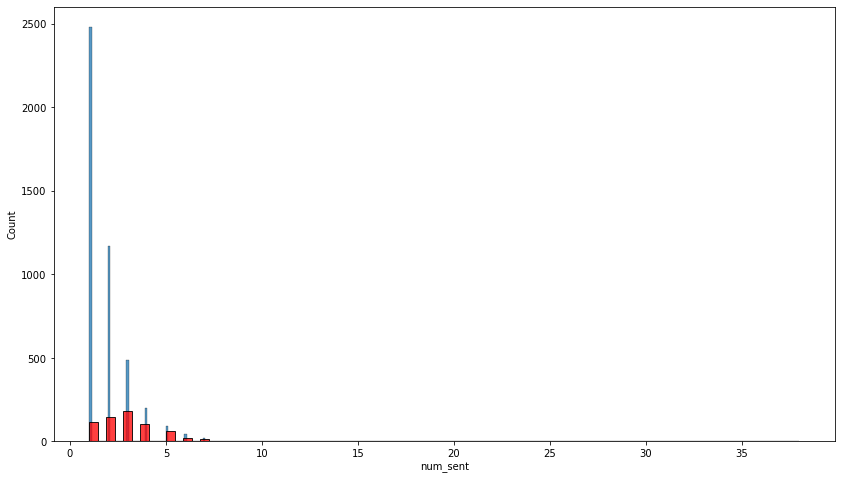

In [38]:
plt.figure(figsize=(14,8))
sns.histplot (df[df['target']==0]['num_sent'])
sns.histplot(df[df['target']==1]['num_sent'],color='red')

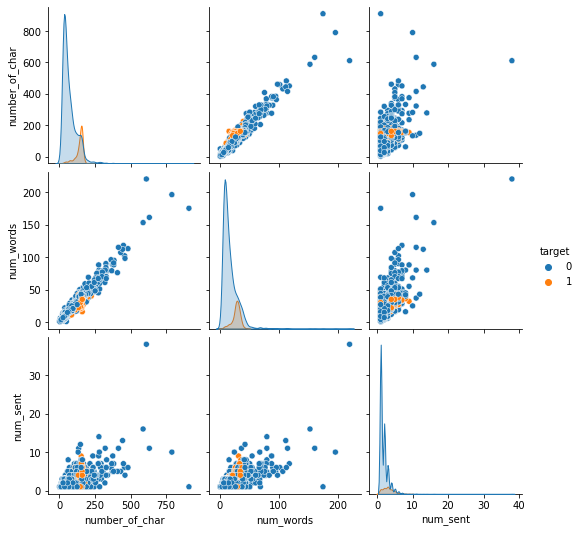

In [39]:
# ploiting a pair plot:
    # a pair plot is a plot that shows relation ship of 
    #target with all new added features
    
sns.pairplot(df, hue='target')

In [40]:
df.corr()

,target,number_of_char,num_words,num_sent
target,1.000000,0.384717,0.262969,0.267602
number_of_char,0.384717,1.000000,0.965784,0.626118
num_words,0.262969,0.965784,1.000000,0.680882
num_sent,0.267602,0.626118,0.680882,1.000000


In [41]:
df['target'].corr(df['num_words'])

0.2629691258780235

In [42]:
df['number_of_char'].corr(df['num_words'])

0.9657843779682435

In [43]:
df['num_words'].corr(df['num_sent'])

0.6808819800988072

<AxesSubplot:>

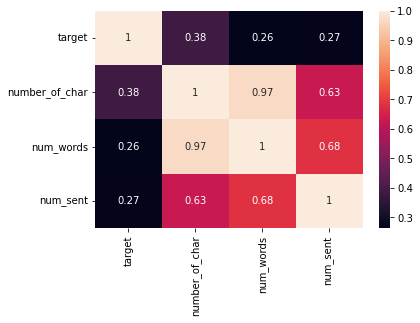

In [44]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing
    - convert all text in lower case
    - Tokenization
    - Remove Special characters
    - Removing stopwords punctuation 
    - Stemming
    

In [45]:
#need to filters stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lab02R01Pc05\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
from nltk.corpus import stopwords 

Stop words  set of commonly used words  language. 
Examples  stop words  English  “a”, “the”, “is”, “are”  
Stop words  commonly used  Text Mining  Natural Language Processing 
(NLP) eliminate words  commonly used carry very little useful information.

In [47]:
stopwords = stopwords.words('english')

In [48]:
import string
punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [50]:
#test code 
ps.stem("beautiful")

'beauti'

In [51]:
def text_transformer(text):
    
    # convert all text in lower case
    text = text.lower()
    
    #Tokenization
    y=[]
    text = nltk.word_tokenize(text)
    
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    # Removing stopwords and punctuations
    for i in text:
        if (i not in stopwords) and (i not in punctuation):
            y.append(i)
    text=y[:]
    y.clear()
    
    
    # apply stemming
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [52]:
"%".isalnum()

False

In [53]:
st=["hgello","hi"]
" ".join(st)

'hgello hi'

In [54]:
#test code
text = nltk.word_tokenize("Hello how are you I am from Pakistan iam 30 ")

In [55]:
text

['Hello', 'how', 'are', 'you', 'I', 'am', 'from', 'Pakistan', 'iam', '30']

In [56]:
alst = [1,2,3,4]
blst = alst[:]

In [57]:
blst

[1, 2, 3, 4]

In [58]:
blst.clear()

In [59]:
blst

[]

In [60]:
alst

[1, 2, 3, 4]

In [61]:
#example testing trasformer function

text_transformer("I am @ good ! boy studying what a wonderful picture it is.?")

'good boy studi wonder pictur'

In [62]:
text_transformer(df.text[10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [63]:
df['transformed_text'] = df.text.apply(text_transformer)

In [64]:
pip install wordcloud

In [65]:
#!pip install wordcloud
from wordcloud import WordCloud

In [66]:
wc = WordCloud(width=800,height=400, min_font_size=10, background_color='white')

In [67]:
spam_word_cloud = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

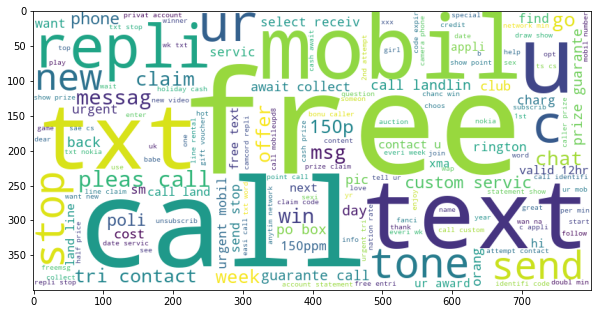

In [68]:
plt.figure(figsize=(10,6))
plt.imshow(spam_word_cloud)

In [69]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)
        
        

In [70]:
 spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [71]:
from collections import Counter


In [72]:
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [73]:
top50frequentwords=pd.DataFrame(Counter(spam_corpus).most_common(50))

In [74]:
top50frequentwords

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [75]:
top50words=pd.DataFrame(Counter(spam_corpus).most_common(50))[0]

In [76]:
top50requency=pd.DataFrame(Counter(spam_corpus).most_common(50))[1]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


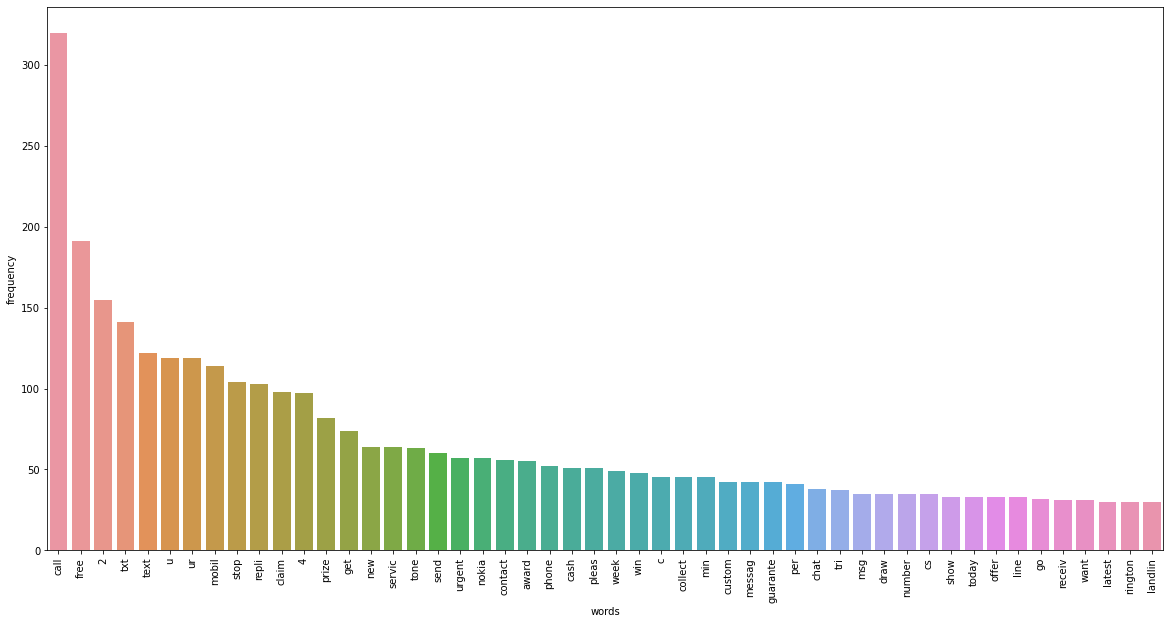

In [77]:
plt.figure(figsize=(20,10))
ax=sns.barplot(top50words,top50requency)
ax.set(xlabel="words",ylabel ="frequency")
plt.xticks(rotation="vertical")
plt.show()



In [78]:
credits = pd.read_csv("credits.csv")
movies = pd.read_csv("movies.csv")


In [79]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [80]:
credits.head(5)["cast"].values

array(['[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "ge

In [81]:
credits.head(5)["crew"].values

array(['[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cam

In [82]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [83]:
movies=movies.merge(credits,on="title")

In [84]:
movies=movies[["movie_id","title","overview","genres","cast","crew"]]

In [85]:

movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
cast        0
crew        0
dtype: int64

In [86]:
movies.dropna(inplace=True)

In [87]:
movies.duplicated().sum()

0

In [88]:
movies.iloc[0]["genres"]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

# Class 43

In [89]:
movies.iloc[0].cast

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [90]:
import ast
def convert_cast(obj):
    l=[]
    for i in ast.literal_eval(obj):
        l.append(i['name'])
    return l
len(movies.cast.apply(convert_cast)[0] )

83

In [91]:
movies.iloc[0].crew

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [92]:
def get_director(obj):
    l=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            l.append(i['name'])
            break
    return l
movie.crew = movies.crew.apply(get_director)

NameError: name 'movie' is not defined

In [93]:
movies.overview[0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [94]:
movies_overview=movies.overview.apply(lambda x:x.split())

In [95]:
movies.head(3)

,movie_id,title,overview,genres,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [96]:
movies.crew=movies.crew.apply(lambda x:[i.replace(" ","") for i in x])
movies.genres=movies.genres.apply(lambda x:[i.replace(" ","") for i in x])
movies.cast=movies.cast.apply(lambda x:[i.replace(" ","") for i in x])
# movies.keywords=movies.keywords.apply(lambda x:[i.replace(" "," ")for i in x])

In [97]:
movies.head(2)

,movie_id,title,overview,genres,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[[, {, "", i, d, "", :, , 2, 8, ,, , "", n, a, m,...","[[, {, "", c, a, s, t, _, i, d, "", :, , 2, 4, 2...","[[, {, "", c, r, e, d, i, t, _, i, d, "", :, , ""..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[[, {, "", i, d, "", :, , 1, 2, ,, , "", n, a, m,...","[[, {, "", c, a, s, t, _, i, d, "", :, , 4, ,, ,...","[[, {, "", c, r, e, d, i, t, _, i, d, "", :, , ""..."


In [98]:
movies["tag"]=movies.overview+movies.genres+movies.cast+movies.crew

TypeError: can only concatenate str (not "list") to str